## DERIVATIVE PRICING
MODULE 1 | LESSON 3


---


# **INTRODUCING DELTA**

|  |  |
|:---|:---|
|**Reading Time** |  45 minutes |
|**Prior Knowledge** | Binomial tree for stock price evolution, Pricing options under  a binomial tree, No-arbitrage argument  |
|**Keywords** |Delta of a security, Delta hedging, Putting all the  previous ideas together  |

*In this lesson, we are going to revisit and reinforce some previous concepts, like option pricing in a binomial tree, and then move on to some new ideas about how we can perfectly hedge away the underlying price risk through **delta hedging**.*

*To begin with, let's see the type of underlying stock price distribution that we are going to be using in the following graph. Remember that, for simplicity, we are going to be using a risk-free rate $r=0$, and that we will be working with (pricing) a call option with strike price $K=90$.*

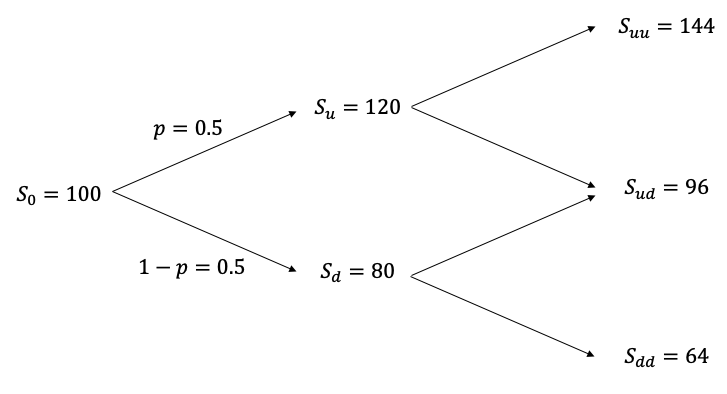

Let's start importing some of the libraries that we will need to use down the road:

In [1]:
import numpy as np

## 1. Delta Hedging in the Binomial Tree


In the following section, you have the code for a general function to price a European call option using a binomial tree methodology. The function, as you can see, is able to compute the evolution of the underlying asset $S_t$, the price of the call option at each node of the tree, $C_t$, and also the $\Delta_t$ (number of shares in terms of exposure) in each node of the tree.

In [2]:
def call_option_delta(S_ini, K, T, r, u, d, N):
    dt = T / N  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    for i in range(0, N + 1):
        C[N, i] = max(S_ini * (u ** (i)) * (d ** (N - i)) - K, 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )
    return C[0, 0], C, S, Delta

In order to understand properly the general function defined above, we are going to use the toy example from the course slides. First of all, we will map the example in the course slides with the parameters in the function "call_option_delta".



*   N = 2 (Two periods/time steps). Thus, we will have three times: $t=0$, $t=1$, $t=2$
*   Delta will be defined in three nodes: one node at $t=0$, named $\Delta_0$, and two nodes (two potential outcomes) at $t=1$: $\Delta_1^u$ and $\Delta_1^d$.

If we run the "call_option_delta" function, we can print directly the underlying asset price, call price, and delta for all nodes as follows. As you can see, these match what you have in the slides:



In [3]:
price, call, S, delta = call_option_delta(100, 90, 15, 0, 1.2, 0.8, 15)
print("Underlying: \n", S)
print("Call Price: \n", call)
print("Delta: \n", delta)

Underlying: 
 [[ 100.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [  80.          120.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [  64.           96.          144.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [  51.2          76.8         115.2         172.8           0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [  40.96         61.44         92.16        138.24        207.36
     0.            0.            0.            0.            0.
     0.            0

According to the above results, we can conclude that, if we want to hedge the sale of this call option (remember, we are selling this as a bank), we will need to perform the following steps:

*   At $t=0$, we have to buy 0.675 shares (assuming that the underlying is a stock).
*   At $t=1$, we have to "hold" 0.1875 shares if we are "down" ($\Delta_1^d$=0.1875) or 1 share if we are "up" ($\Delta_1^u$=1). 

To give you a complete idea of how the hedging system would work in practice, we will focus on the path, $du$.  

Thus, at the first step, we follow the path "down". Than means that at $t=0$, we buy 0.675 shares at \\$100 USD price per share = \\$67.5 USD total cost. At $t=1$, we sell 0.4875 shares (0.675-0.1875 = 0.4875 shares) at \\$80 USD price to get \\$39 USD. Thus, we end up at $t=1$ with a cost of \\$28.5 USD, but we still have 0.1875 shares. 

Finally, if we end up following the path "${du}$" (first down and then up), the final price of the underlying is \\$96 USD and the payoff of our call is \\$6 USD. Thus, we have at maturity, +96*0.1875 - 28.5 = \\$-10.5 USD. The price of the call in this path ("${du}$"), as you can see in the above results, is equal to $c_2^{du}=6$ USD. This \\$6 USD is the payment that we need to fulfill with the buyer; thus, our total cost is -10.5 - 6 = \\$16.5 USD, which is the call price. 



## 2. Generalization to Any N

It is easy, once the above example is properly understood, to generalize the binomial tree and the hedging strategy to any number of time steps. For instance, see the example below with N=4.<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

In [4]:
price, call, S, delta = call_option_delta(100, 90, 10, 0, 1.2, 0.8, 10)
print("Underlying: \n", S)
print("Call Price: \n", call)
print("Delta: \n", delta)

Underlying: 
 [[100.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [ 80.         120.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [ 64.          96.         144.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [ 51.2         76.8        115.2        172.8          0.
    0.           0.           0.           0.           0.
    0.        ]
 [ 40.96        61.44        92.16       138.24       207.36
    0.           0.           0.           0.           0.
    0.        ]
 [ 32.768       49.152       73.728      110.592      165.888
  248.832        0.           0.           0.           0.
    0.        ]
 [ 26.2144      39.3216      58.9824      88.4736     132.7104
  199.0656     298.5984       0.           0.           0.
    0.        ]
 [ 20.97152     31.45728     47.18592  

The price of the call is equal to \\$20.205 USD, which is quite different from the previous value of \\$16.5 USD. You will notice that if you try with a higher N, the call price will increase monotonically. See the code snippet below:

### 2.1. Convergence

Next, let's check the power of the binomial pricing method. In the following code snippet, we calculate the price of the option for different N's. Execute the following code to see how the price of the option changes with N.

In [5]:
price_array = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]:
    price, call, S, delta = call_option_delta(100, 90, 1, 0, 1.2, 0.8, N)
    price_array.append(price)
    print("With N = {:3d}, the price is {:.2f}".format(N, price))

With N =   1, the price is 15.00
With N =  10, the price is 29.38
With N = 100, the price is 70.32
With N = 200, the price is 85.40
With N = 300, the price is 92.33
With N = 400, the price is 95.84
With N = 500, the price is 97.70
With N = 600, the price is 98.71
With N = 700, the price is 99.27
With N = 800, the price is 99.58
With N = 900, the price is 99.76
With N = 1000, the price is 99.86
With N = 1500, the price is 99.99
With N = 2000, the price is 100.00
With N = 2500, the price is 100.00


In the next snippet, you can see this from a more visual perspective:

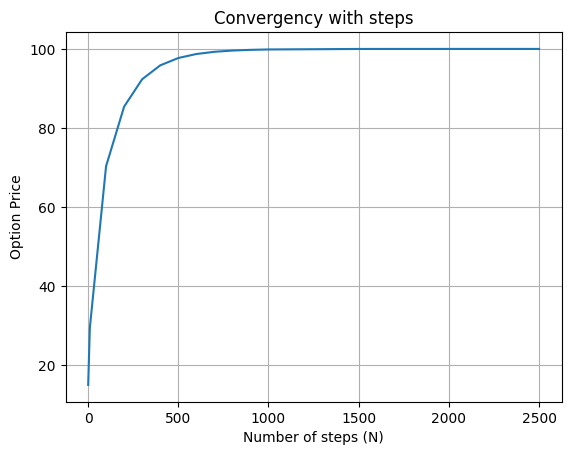

In [6]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]
plt.plot(N, np.array(price_array))
plt.title("Convergency with steps")
plt.xlabel("Number of steps (N)")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()

Of course, the maximum value of the call price must be the underlying price. The question is, **why are we getting this absurd behavior?**

## 3. Conclusion

We have gone over the basic steps to price options in a binomial model and explore how the prices we obtain change when we use a different number of steps in the model. However, the results from these experiments yielded somewhat inconsistent, or absurd, results.

In the next lesson, we will see that we need to adjust "$u$" and "$d$" with the number of steps ($dt$) in order to match the underlying asset's volatility. Doing this, we will get rid of the previous problem.

See you in the next lesson!

**References**

- Hull, J. C. (2021). *Options futures and other derivatives*. 11th Edition. Pearson. Chapter 13.


---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
